In [35]:
!pip install pandas numpy scikit-learn sqlalchemy psycopg2-binary matplotlib seaborn joblib python-dotenv

Defaulting to user installation because normal site-packages is not writeable


# Retail sale Analysis

### Goal :
Analysis monthly sales and build interactive dashboards. 

## 1.Data Loading and inspection

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

In [61]:
warnings.filterwarnings('ignore')

sales= pd.read_csv("C:\\Users\\kamal\\Music\\retailsale\\retaildata.csv")

In [62]:
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
 18  Profit  

In [21]:
sales.dtypes


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Profit           float64
dtype: object

#### Missing Values

In [22]:
print("Missing Values:")
print(sales.isna().sum())

Missing Values:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Profit            0
dtype: int64


#### Duplicate Rows

In [23]:
print("\nDuplicate Rows:", sales.duplicated().sum())



Duplicate Rows: 0


## 2.Data preprocessing

In [82]:
# Convert date columns to datetime

sales['Order Date'] = pd.to_datetime(sales['Order Date'], format='%d/%m/%Y')
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'], format='%d/%m/%Y')

In [83]:
# Extract year and month from Order Date

sales['Order Year'] = sales['Order Date'].dt.year
sales['Order Month'] = sales['Order Date'].dt.month_name()
sales['Month Number'] = sales['Order Date'].dt.month

In [84]:
# Create a profit column (assuming 25% profit margin for this analysis)
sales['Profit'] = sales['Sales'] * 0.25

## 3. Exploratory Data Analysis (EDA)

#### Sales Statistics

In [32]:
print("Sales Statistics:")
print(sales['Sales'].describe())

Sales Statistics:
count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64


#### Profit Statistics

In [33]:
print("Profit Statistics:")
print(sales['Profit'].describe())

Profit Statistics:
count    9800.000000
mean       57.692265
std       156.662969
min         0.111000
25%         4.312000
50%        13.622500
75%        52.651250
max      5659.620000
Name: Profit, dtype: float64


#### Top 10 product by Sales 

In [37]:
top_products = sales.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Sales:")
print(top_products)


Top 10 Products by Sales:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


#### Sales by category

In [40]:
category_sales = sales.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
print("\nSales by Category:")
print(category_sales)


Sales by Category:
                       Sales         Profit
Category                                   
Technology       827455.8730  206863.968250
Furniture        728658.5757  182164.643925
Office Supplies  705422.3340  176355.583500


#### Sales by year

In [42]:
year_sale= sales.groupby('Order Year')['Sales'].sum().sort_values( ascending=False)
print("\nSales by year:")
print(year_sale)



Sales by year:
Order Year
2018    722052.0192
2017    600192.5500
2015    479856.2081
2016    459436.0054
Name: Sales, dtype: float64


#### sales by month

In [43]:
month_sale= sales.groupby('Order Month')['Sales'].sum().sort_values( ascending=False)
print("\nSales by year:")
print(month_sale)


Sales by year:
Order Month
November     350161.7110
December     321480.1695
September    300103.4117
October      199496.2947
March        197573.5872
August       157315.9270
May          154086.7237
June         145837.5233
July         145535.6890
April        136283.0006
January       94291.6296
February      59371.1154
Name: Sales, dtype: float64


## 4. Data Visualization

In [44]:
# Set figure size for all plots
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

### Monthly sale trend

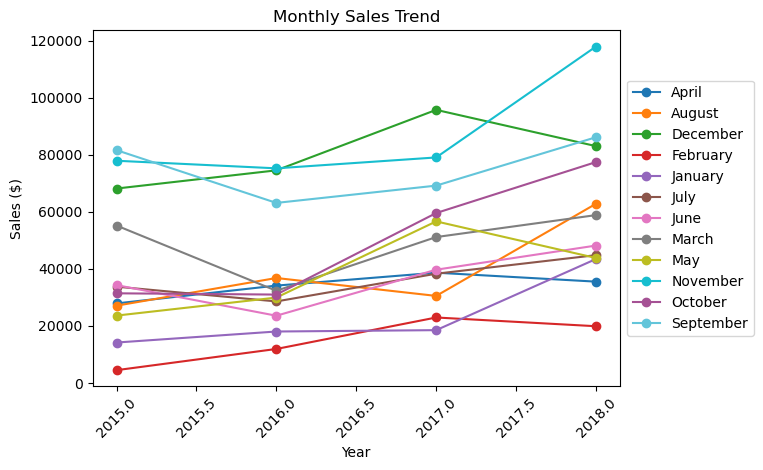

In [57]:

    monthly_sales = sales.groupby(['Order Year', 'Order Month'])['Sales'].sum().unstack()
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#a55194', '#63c5da'  # 12 colors for 12 months
]
    monthly_sales.plot(kind='line',color=colors, marker='o')
    plt.title('Monthly Sales Trend')
    plt.ylabel('Sales ($)')
    plt.xlabel('Year')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

### sales by category 

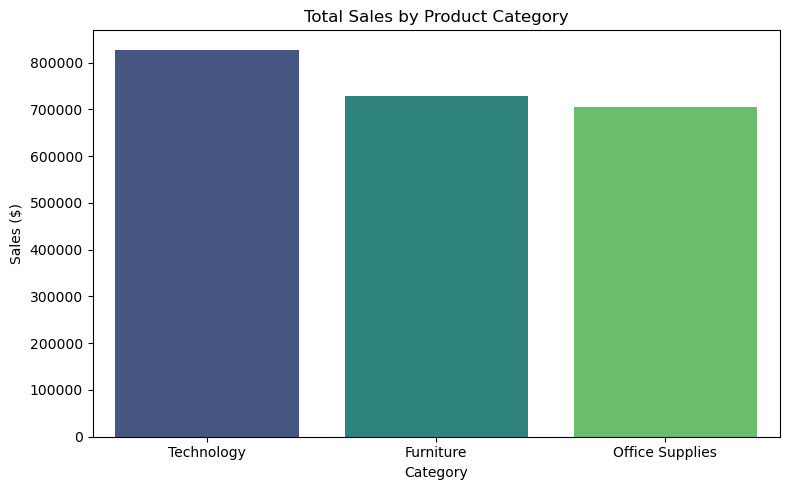

In [66]:

plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales['Sales'], palette='viridis')
plt.title('Total Sales by Product Category')
plt.ylabel('Sales ($)')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

### Top 10 product by sales

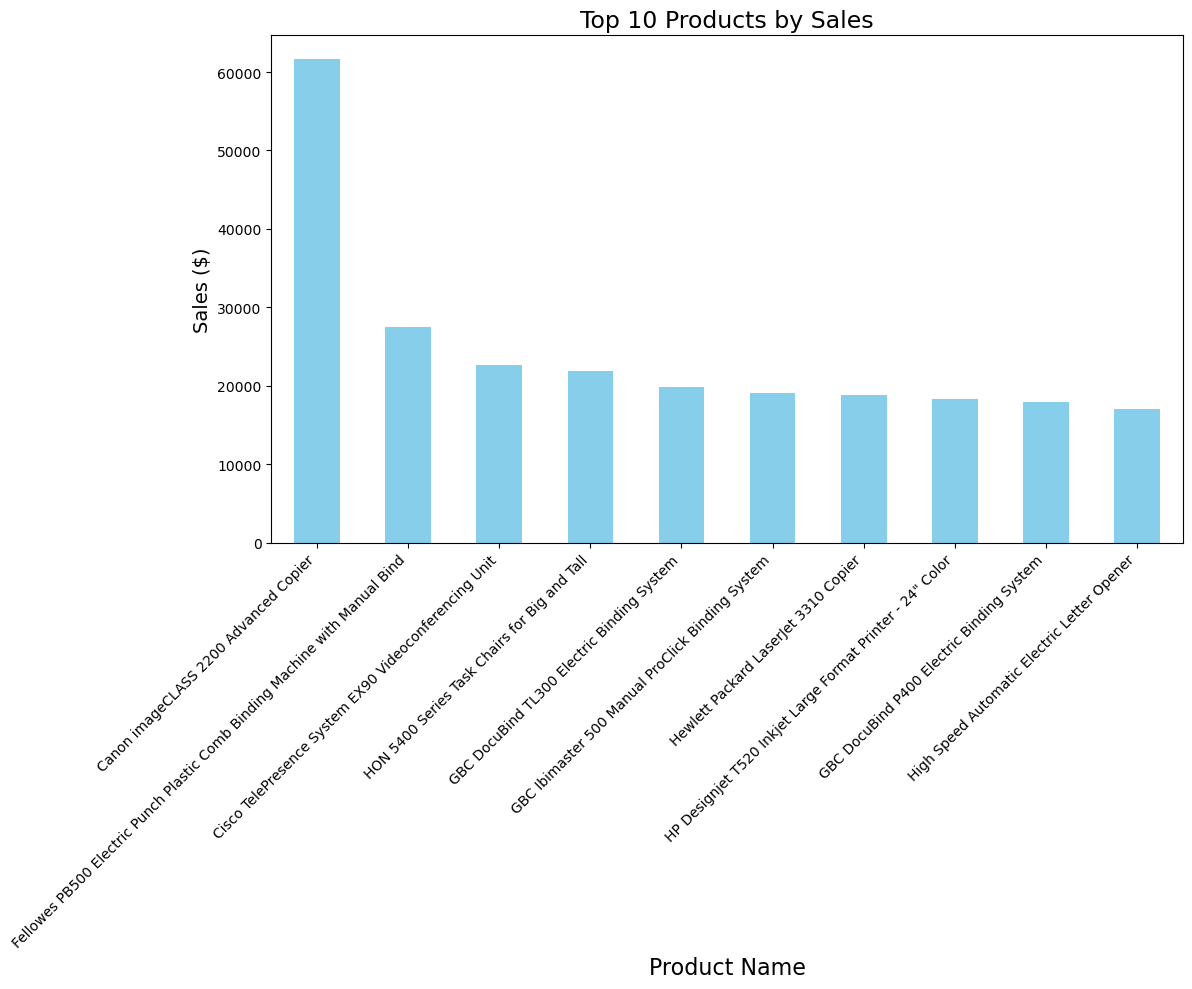

In [69]:
# Top 10 products visualization
plt.figure(figsize=(12, 10))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Sales' ,fontsize=17)
plt.ylabel('Sales ($)',fontsize=14)
plt.xlabel('Product Name',fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

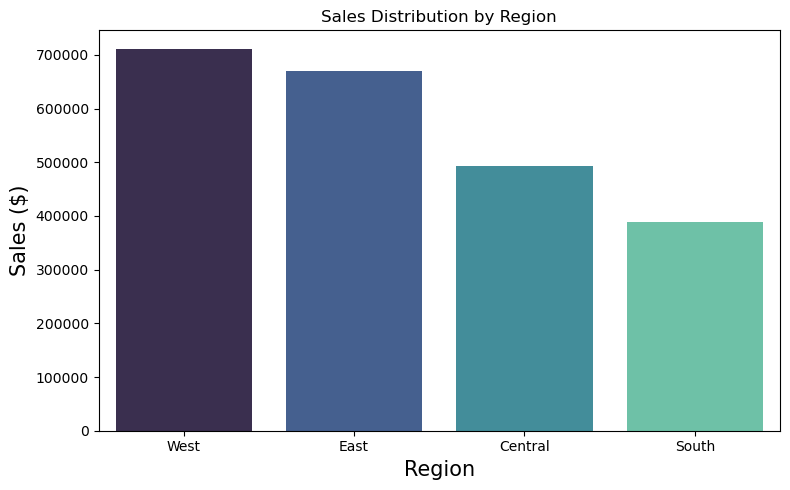

In [74]:
plt.figure(figsize=(8, 5))
region_sales = sales.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, palette='mako')
plt.title('Sales Distribution by Region')
plt.ylabel('Sales ($)',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.tight_layout()
plt.show()

## 5. Customer Analysis


#### Top customers by sales


In [75]:
top_customers = sales.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Sales:")
print(top_customers)


Top 10 Customers by Sales:
Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


#### Top segement of sales

In [77]:
segment_analysis = sales.groupby('Segment')[['Sales', 'Profit']].sum()
print("\nSales and Profit by Customer Segment:")
print(segment_analysis)


Sales and Profit by Customer Segment:
                    Sales        Profit
Segment                                
Consumer     1.148061e+06  229612.10620
Corporate    6.884941e+05  137698.81496
Home Office  4.249822e+05   84996.43538


### Customer segment visualization

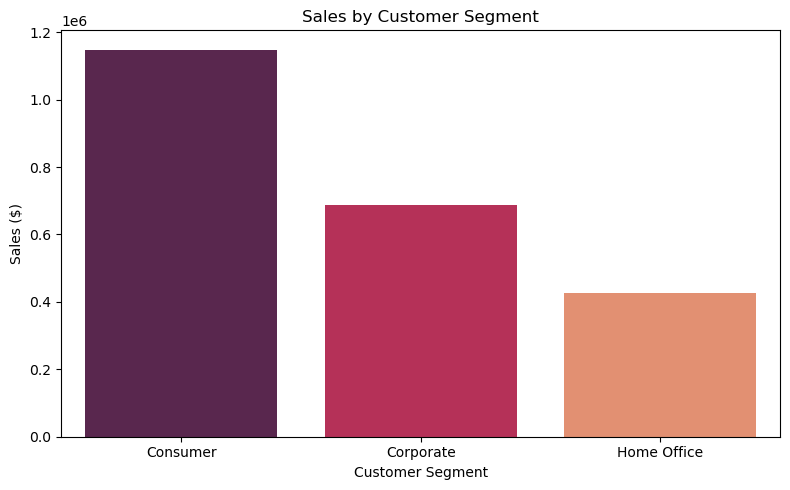

In [79]:

plt.figure(figsize=(8, 5))
sns.barplot(x=segment_analysis.index, y=segment_analysis['Sales'], palette='rocket')
plt.title('Sales by Customer Segment')
plt.ylabel('Sales ($)')
plt.xlabel('Customer Segment')
plt.tight_layout()
plt.show()

## 6. Time Series Analysis

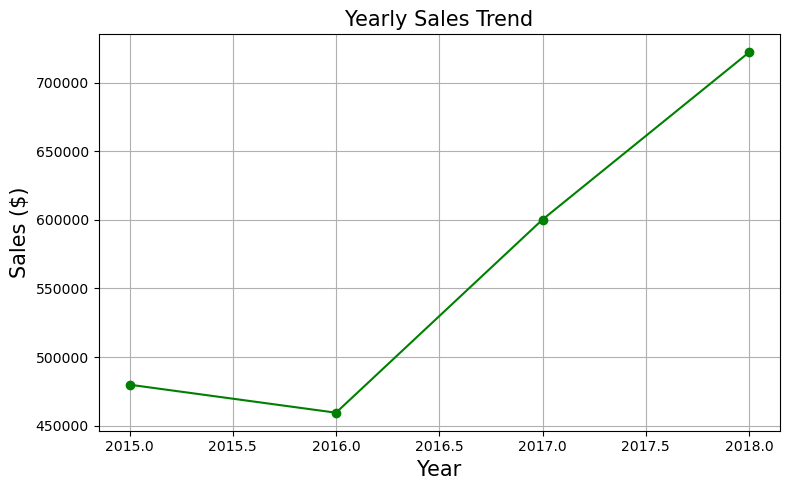

In [88]:
yearly_sales = sales.groupby('Order Year')['Sales'].sum()
plt.figure(figsize=(8, 5))
yearly_sales.plot(kind='line', marker='o', color='green')
plt.title('Yearly Sales Trend', fontsize=15)
plt.ylabel('Sales ($)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Monthly sales for all years

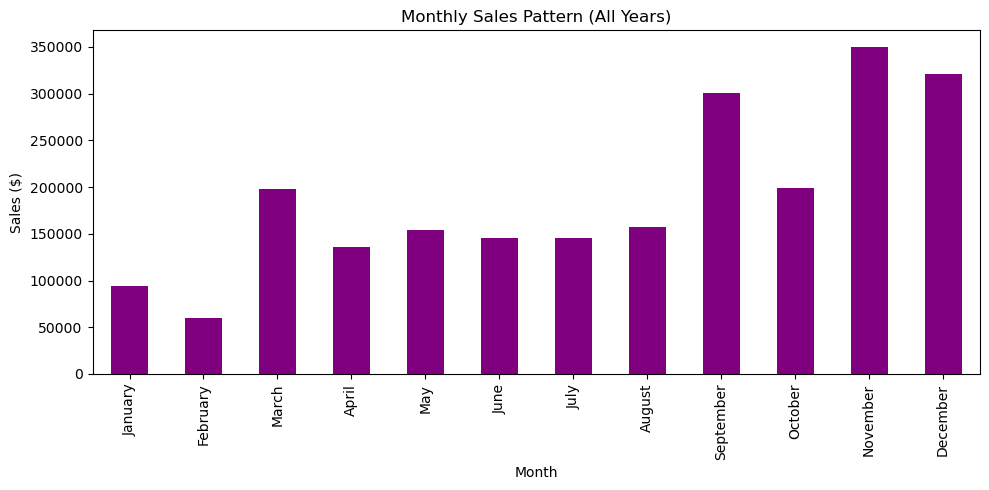

In [90]:
monthly_pattern = sales.groupby('Order Month')['Sales'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.figure(figsize=(10, 5))
monthly_pattern.plot(kind='bar', color='purple')
plt.title('Monthly Sales Pattern (All Years)')
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

## 7. Product Performance Analysis

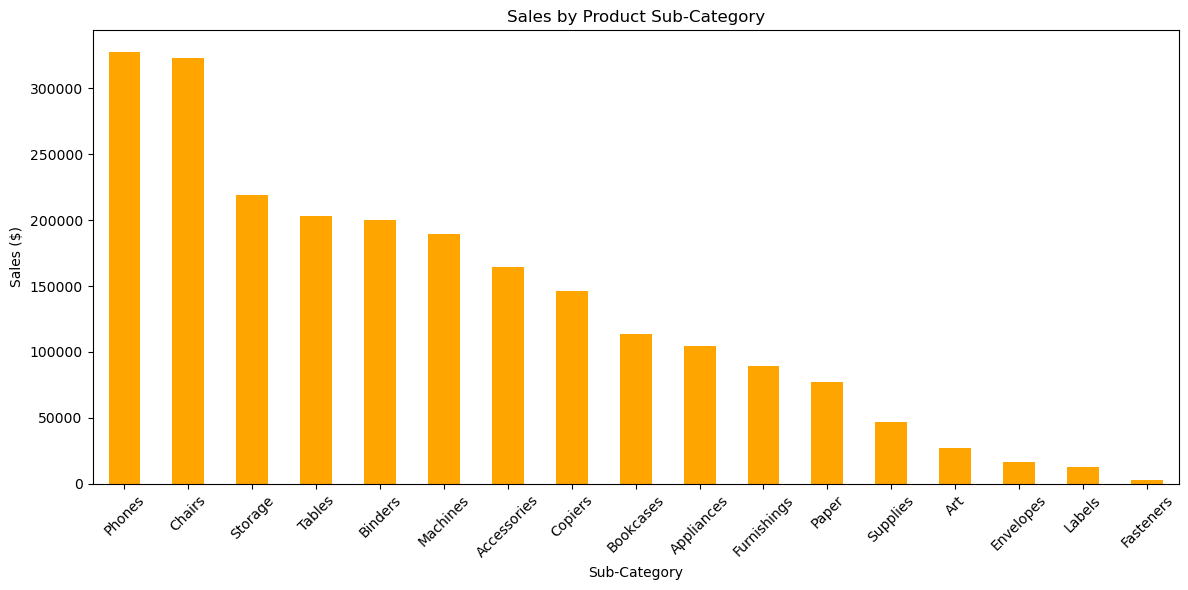

In [91]:
# Product sub-category analysis
subcategory_sales = sales.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
subcategory_sales.plot(kind='bar', color='orange')
plt.title('Sales by Product Sub-Category')
plt.ylabel('Sales ($)')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

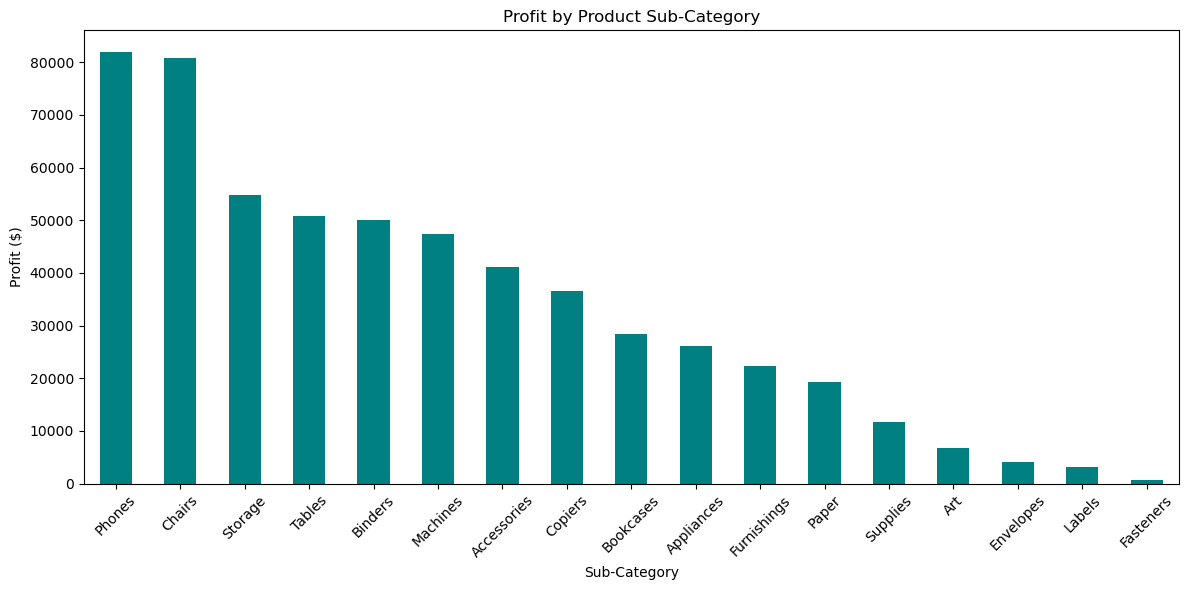

In [93]:

subcategory_profit = sales.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
subcategory_profit.plot(kind='bar', color='teal')
plt.title('Profit by Product Sub-Category')
plt.ylabel('Profit ($)')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Geographic Analysis

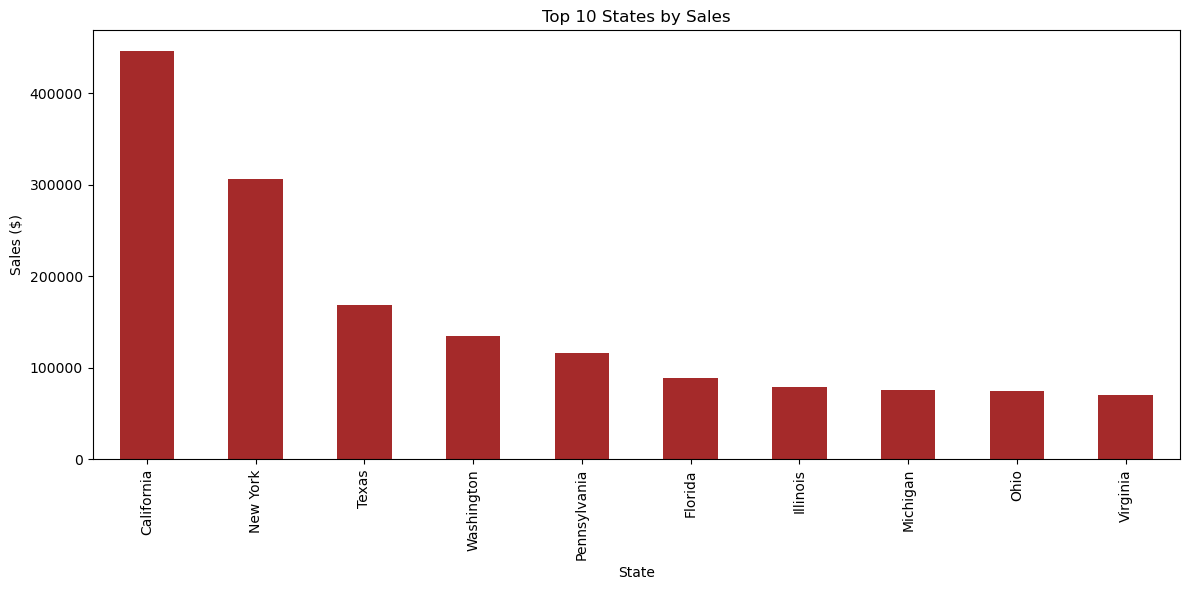

In [94]:
# Top states by sales
state_sales = sales.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar', color='brown')
plt.title('Top 10 States by Sales')
plt.ylabel('Sales ($)')
plt.xlabel('State')
plt.tight_layout()
plt.show()

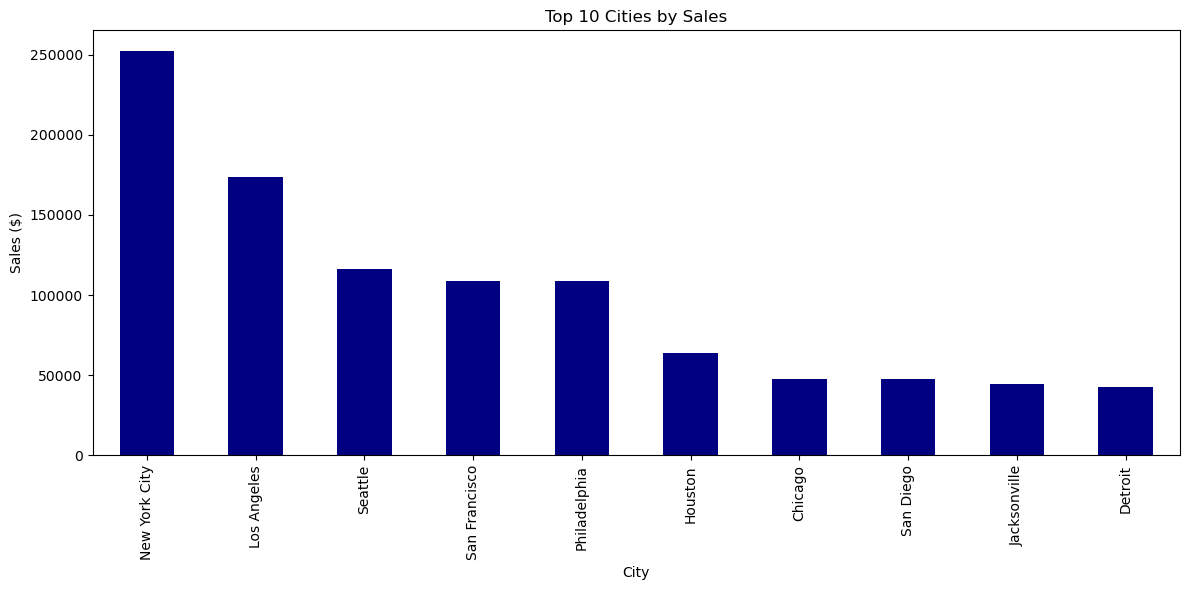

In [96]:
# Top cities by sales
city_sales = sales.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar', color='navy')
plt.title('Top 10 Cities by Sales')
plt.ylabel('Sales ($)')
plt.xlabel('City')
plt.tight_layout()
plt.show()

## 9. Shipping Analysis

In [97]:
# Shipping mode analysis
shipping_analysis = sales.groupby('Ship Mode')[['Sales', 'Profit']].sum()
print("\nSales and Profit by Shipping Mode:")
print(shipping_analysis)


Sales and Profit by Shipping Mode:
                       Sales         Profit
Ship Mode                                  
First Class     3.455723e+05   86393.064325
Same Day        1.252190e+05   31304.759750
Second Class    4.499142e+05  112478.544850
Standard Class  1.340831e+06  335207.826750


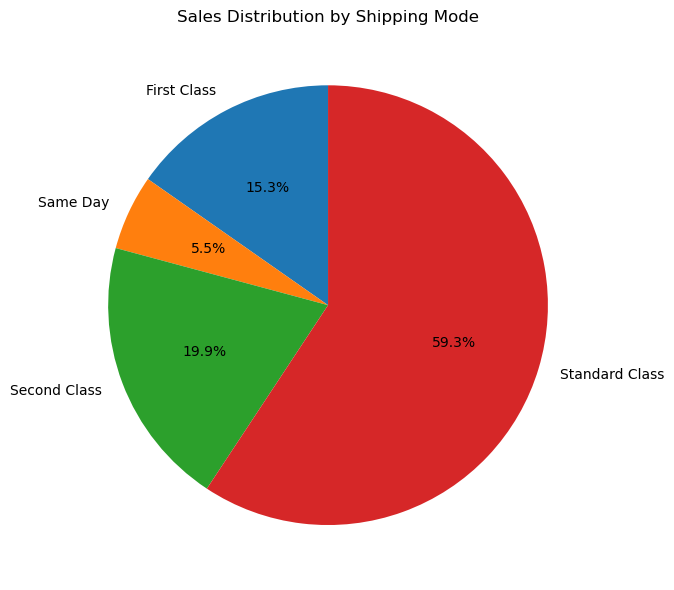

In [98]:
# Shipping mode visualization
plt.figure(figsize=(10, 6))
shipping_analysis['Sales'].plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Shipping Mode')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Key Insights and Recommendations

In [100]:
# Calculate key metrics
total_sales = sales['Sales'].sum()
total_profit = sales['Profit'].sum()
avg_order_value = sales['Sales'].mean()
top_product = top_products.index[0]
top_category = category_sales.index[0]
top_state = state_sales.index[0]
top_city = city_sales.index[0]
best_segment = segment_analysis['Profit'].idxmax()

In [101]:
# Display insights
print("\n=== KEY INSIGHTS ===")
print(f"1. Total Sales: ${total_sales:,.2f}")
print(f"2. Total Profit: ${total_profit:,.2f}")
print(f"3. Average Order Value: ${avg_order_value:,.2f}")
print(f"4. Top Selling Product: {top_product}")
print(f"5. Top Performing Category: {top_category}")
print(f"6. Top State by Sales: {top_state}")
print(f"7. Top City by Sales: {top_city}")
print(f"8. Most Profitable Customer Segment: {best_segment}")


=== KEY INSIGHTS ===
1. Total Sales: $2,261,536.78
2. Total Profit: $565,384.20
3. Average Order Value: $230.77
4. Top Selling Product: Canon imageCLASS 2200 Advanced Copier
5. Top Performing Category: Technology
6. Top State by Sales: California
7. Top City by Sales: New York City
8. Most Profitable Customer Segment: Consumer


In [102]:
# Recommendations
print("\n=== RECOMMENDATIONS ===")
print("1. Focus marketing efforts on the top performing categories and products.")
print("2. Increase inventory for high-demand products in top cities and states.")
print("3. Develop targeted campaigns for the most profitable customer segments.")
print("4. Optimize shipping methods to reduce costs and improve profitability.")
print("5. Implement loyalty programs for 'Champions' identified in RFM analysis.")
print("6. Consider promotions during low-sales months to balance seasonal demand.")


=== RECOMMENDATIONS ===
1. Focus marketing efforts on the top performing categories and products.
2. Increase inventory for high-demand products in top cities and states.
3. Develop targeted campaigns for the most profitable customer segments.
4. Optimize shipping methods to reduce costs and improve profitability.
5. Implement loyalty programs for 'Champions' identified in RFM analysis.
6. Consider promotions during low-sales months to balance seasonal demand.


In [104]:
# Save cleaned data
sales.to_csv('Cleaned_Sales_Data.csv', index=False)

# Save key metrics to a separate file
key_metrics = pd.DataFrame({
    'Metric': ['Total Sales', 'Total Profit', 'Average Order Value', 
               'Top Product', 'Top Category', 'Top State', 'Top City', 
               'Best Customer Segment'],
    'Value': [total_sales, total_profit, avg_order_value, 
              top_product, top_category, top_state, top_city, best_segment]
})
key_metrics.to_csv('Sales_Key_Metrics.csv', index=False)

print("\nAnalysis completed and results exported successfully!")


Analysis completed and results exported successfully!
